# Modelos de Clasificación: Árbol de Decisión y Random Forest

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn import tree
from graphviz import Source

## Configuración de visualización

In [2]:
sns.set(style='whitegrid')

## Cargar datos

In [3]:
data_file = 'data/eda_data.csv'
df = pd.read_csv(data_file)

## Preprocesar datos

In [4]:

selected_columns = ['cord_x', 'cord_y', 'track_id']
new_df = df[selected_columns]

X = new_df.drop('track_id', axis=1)
y = new_df['track_id']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Árbol de Decisión

## Entrenar y evaluar el modelo

In [5]:
decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, class_weight='balanced')
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del Árbol de Decisión: {accuracy:.2f}')

Accuracy del Árbol de Decisión: 0.90


## Visualización del árbol

In [6]:
num_classes = len(np.unique(y))
class_names = [str(cls) for cls in np.unique(y)]

In [7]:
with open("dots/decision_tree.dot", 'w') as f:
    tree.export_graphviz(decision_tree, out_file=f, feature_names=X.columns, class_names=class_names, rounded=True, filled=True)


## Convertir a PNG 

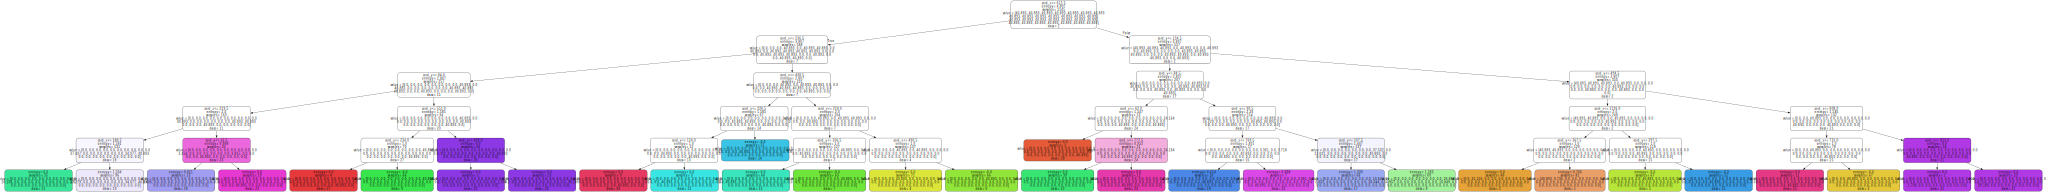

In [8]:
graph = Source.from_file("dots/decision_tree.dot")
graph.render("dots/decision_tree", format="png", cleanup=True)
graph

# Random Forest
## Entrenar y evaluar el modelo

In [9]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

## Evaluación del modelo


In [10]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')

print(f'Accuracy del Bosque Aleatorio: {accuracy_rf:.2f}')
print(f'Precision del Bosque Aleatorio: {precision_rf:.2f}')
print(f'Recall del Bosque Aleatorio: {recall_rf:.2f}')

Accuracy del Bosque Aleatorio: 0.95
Precision del Bosque Aleatorio: 0.95
Recall del Bosque Aleatorio: 0.95


C:\Users\mikeb\OneDrive\Escritorio\Proyectos\Python\proyecto-ia-arch\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Matriz de confusión y reporte de clasificación

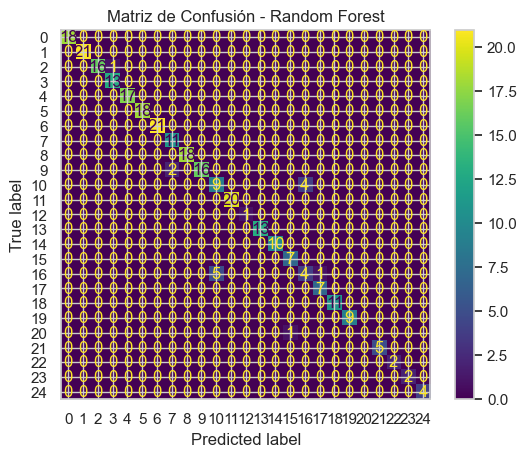

In [11]:
cm = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('Matriz de Confusión - Random Forest')
plt.show()

## Importancia de características

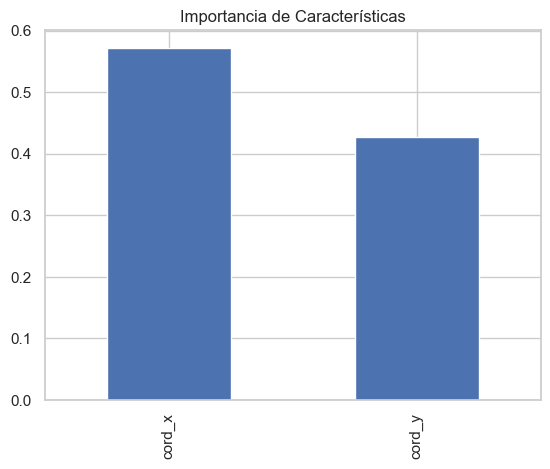

In [12]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.plot(kind='bar')
plt.title('Importancia de Características')
plt.show()